In [21]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
folder = "HO_performance_with_SAVER/"
data_names = ['MouseWT', 'MouseAD', 'Melanoma', 'Prostate']

In [10]:
slide_perfs = []
for dn in data_names:
    df = pd.read_csv(f"{folder}/{dn}/performance/slide_level_results.csv", index_col=0)
    df.replace('spImpute', 'MIST', inplace=True)
    df['data'] = dn
    slide_perfs.append(df)
slide_perfs = pd.concat(slide_perfs)

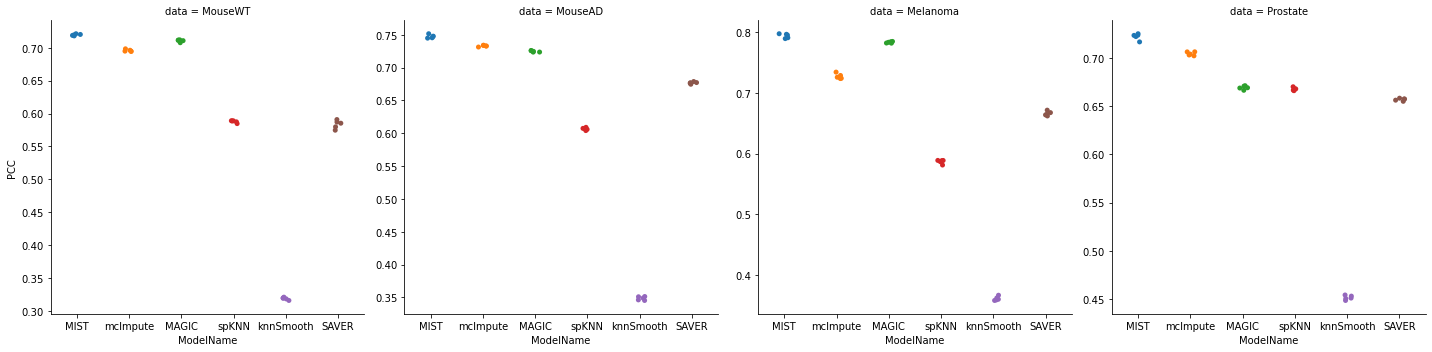

In [11]:
sns.catplot(data=slide_perfs, x='ModelName', y='PCC', kind='strip', sharey=False, col='data')

In [12]:
slide_perfs.reset_index(drop=True, inplace=True)
slide_perfs

,RMSE,MAPE,SNR,PCC,ModelName,hoMR,impMR,redMR,cvFold,data
0,0.951621,0.106325,3.359624,0.720365,MIST,0.423434,0.000195,0.423238,0,MouseWT
1,0.994848,0.109045,3.320680,0.696334,mcImpute,0.423434,0.000665,0.422768,0,MouseWT
2,1.114231,0.115074,2.998501,0.711805,MAGIC,0.423434,0.000000,0.423434,0,MouseWT
3,1.654913,0.160092,2.468935,0.588758,spKNN,0.423434,0.009947,0.413487,0,MouseWT
4,2.639549,0.251409,2.126689,0.320682,knnSmooth,0.423434,0.048790,0.374643,0,MouseWT
...,...,...,...,...,...,...,...,...,...,...
115,0.736175,0.397069,1.813561,0.702013,mcImpute,0.436921,0.000747,0.436174,4,Prostate
116,0.859251,0.333910,1.313248,0.668649,MAGIC,0.436921,0.000118,0.436804,4,Prostate
117,0.942818,0.391879,0.998365,0.666524,spKNN,0.436921,0.013451,0.423470,4,Prostate
118,1.393700,0.738810,1.173355,0.450588,knnSmooth,0.436921,0.053156,0.383765,4,Prostate


In [13]:
slide_perfs.to_excel("Supp. Fig3.1.xlsx", sheet_name='Supp. Fig3.1')

In [48]:
## 3.3
from glob import glob
from scipy.stats import spearmanr

corr(HO-Observed) = 0.6425745910739477
corr(HO-MIST) = 0.9641582712018331


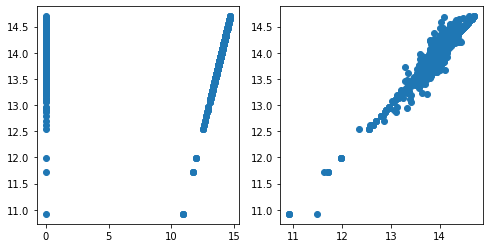

In [49]:
## Mouse WT
ho_vals, mist_vals, ori_vals = [], [], []
for i in range(5):
    df_ho = np.log2(pd.read_csv(f"data/MouseWT/MouseWT/ho_data_{i}.csv", index_col=0)['Gm29216'] + 1)
    df_mask = np.log2(pd.read_csv(f"data/MouseWT/MouseWT/ho_mask_{i}.csv", index_col=0)['Gm29216'] + 1)
    df_mist = np.log2(pd.read_csv(glob(f"data/MouseWT/MouseWT/MIST_*_{i}.csv")[0], index_col=0)['Gm29216'] + 1)
    df_ori = np.log2(pd.read_csv(f"data/MouseWT/MouseWT/norm.csv", index_col=0)['Gm29216'] + 1)
    ho_vals += list(df_ho)
    mist_vals += list(df_mist)
    ori_vals += list(df_ori)
f1, (ax11, ax12) = plt.subplots(1, 2, figsize=(8,4))
ax11.scatter(ho_vals, ori_vals)
ax12.scatter(mist_vals, ori_vals)

print(f"corr(HO-Observed) = {spearmanr(ho_vals, ori_vals)[0]}")
print(f"corr(HO-MIST) = {spearmanr(mist_vals, ori_vals)[0]}")

In [38]:
df1 = pd.DataFrame({'Gm29216 (MouseWT) HO':  ho_vals,
                   'Gm29216 (MouseWT) Observed':  ori_vals,
                   'Gm29216 (MouseWT) MIST':  mist_vals})

In [42]:
### MouseAD
ho_vals, mist_vals, ori_vals = [], [], []
for i in range(5):
    df_ho = np.log2(pd.read_csv(f"data/MouseAD/MouseAD/ho_data_{i}.csv", index_col=0)['mt-Rnr1'] + 1)
    df_mask = np.log2(pd.read_csv(f"data/MouseAD/MouseAD/ho_mask_{i}.csv", index_col=0)['mt-Rnr1'] + 1)
    df_mist = np.log2(pd.read_csv(glob(f"data/MouseAD/MouseAD/MIST_*_{i}.csv")[0], index_col=0)['mt-Rnr1'] + 1)
    df_ori = np.log2(pd.read_csv(f"data/MouseAD/MouseAD/norm.csv", index_col=0)['mt-Rnr1'] + 1)
    ho_vals += list(df_ho)
    mist_vals += list(df_mist)
    ori_vals += list(df_ori)

f2, (ax21, ax22) = plt.subplots(1, 2, figsize=(8,4))
ax21.scatter(ho_vals, ori_vals)
ax22.scatter(mist_vals, ori_vals)

print(f"corr(HO-Observed) = {spearmanr(ho_vals, ori_vals)[0]}")
print(f"corr(HO-MIST) = {spearmanr(mist_vals, ori_vals)[0]}")
    
df2 = pd.DataFrame({'mt-Rnr1 (MouseAD) HO':  ho_vals,
                   'mt-Rnr1 (MouseAD) Observed':  ori_vals,
                   'mt-Rnr1 (MouseAD) MIST':  mist_vals})    

corr(HO-Observed) = 0.6425747300508888
corr(HO-MIST) = 0.9637430785479688


corr(HO-Observed) = 0.6425743109181178
corr(HO-MIST) = 0.965251943415212


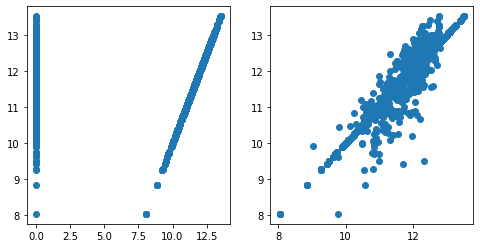

In [46]:
### Prostate
ho_vals, mist_vals, ori_vals = [], [], []
for i in range(5):
    df_ho = np.log2(pd.read_csv(f"data/Prostate/Prostate/ho_data_{i}.csv", index_col=0)['MYL9 ENSG00000101335'] + 1)
    df_mask = np.log2(pd.read_csv(f"data/Prostate/Prostate/ho_mask_{i}.csv", index_col=0)['MYL9 ENSG00000101335'] + 1)
    df_mist = np.log2(pd.read_csv(glob(f"data/Prostate/Prostate/MIST_*_{i}.csv")[0], index_col=0)['MYL9 ENSG00000101335'] + 1)
    df_ori = np.log2(pd.read_csv(f"data/Prostate/Prostate/norm.csv", index_col=0)['MYL9 ENSG00000101335'] + 1)
    ho_vals += list(df_ho)
    mist_vals += list(df_mist)
    ori_vals += list(df_ori)

f3, (ax31, ax32) = plt.subplots(1, 2, figsize=(8,4))
ax31.scatter(ho_vals, ori_vals)
ax32.scatter(mist_vals, ori_vals)

print(f"corr(HO-Observed) = {spearmanr(ho_vals, ori_vals)[0]}")
print(f"corr(HO-MIST) = {spearmanr(mist_vals, ori_vals)[0]}")
    
df3 = pd.DataFrame({'MYL9 (Prostate) HO':  ho_vals,
                   'MYL9 (Prostate) Observed':  ori_vals,
                   'MYL9 (Prostate) MIST':  mist_vals})    

In [55]:
supp33_df = pd.concat([df1, df2, df3], axis=1)

In [51]:
supp33_df.to_excel("Supp. Fig3.3.")

,Gm29216 (MouseWT) HO,Gm29216 (MouseWT) Observed,Gm29216 (MouseWT) MIST
0,14.169142,14.169142,14.169142
1,0.000000,14.231821,14.229800
2,0.000000,14.157031,13.981519
3,13.808663,13.808663,13.808663
4,13.490224,13.490224,13.490224
...,...,...,...
2230,13.937282,13.937282,13.937282
2231,0.000000,14.199902,14.080529
2232,14.139312,14.139312,14.139312
2233,0.000000,13.962806,13.814979
